# MMQ para dados climáticos

In [385]:
#imports das bibliotecas necessaria
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import scipy.stats as sp

### Dados

Os dados obtidos são de periodicidade mensal, começando a partir de janeiro 1980 e encerrando em dezembro de 2023.

In [386]:
#importar dados para regressão
df = pd.read_excel('Data/final_data.xlsx')
df

,Unnamed: 0,year,month,decimal date,temperature anomalies,Co2 ppm
0,0,1980,1,1980.042,0.37,338.55
1,1,1980,2,1980.125,0.46,339.26
2,2,1980,3,1980.208,0.35,339.59
3,3,1980,4,1980.292,0.34,339.99
4,4,1980,5,1980.375,0.39,340.44
...,...,...,...,...,...,...
523,523,2023,8,2023.625,1.26,416.65
524,524,2023,9,2023.708,1.43,417.06
525,525,2023,10,2023.792,1.37,418.73
526,526,2023,11,2023.875,1.42,420.34


In [387]:
#Dados para previsão
array_prev = [2034.0410, 2034.1257, 2034.2049, 2034.2896, 2034.3716, 2034.4563, 2034.5383, 2034.6230, 2034.7077, 2034.7896, 2034.8743, 2034.9563]

### Funções Auxiliares

In [388]:
def treinar_modelo(x_, y_):
    x_ = sm.add_constant(x_)
    model = sm.OLS(y_,x_)
    res = model.fit()
    return res   

In [389]:
def plotgrafico(xlabel = "", ylabel="", label="", linha = 0, titulo = 'Gráfico', funcao = True, fileN = "grafico"):
    graf, eix = plt.subplots(figsize = (15,6))
    eix.scatter(x,y, color = 'black', s = 13)
    eix.set_ylabel(ylabel)
    eix.set_xlabel(xlabel)
    eix.set_title(titulo)
    eix.title.set_size(20)
    eix.xaxis.label.set_size(16)
    eix.yaxis.label.set_size(16)
    if funcao == True:
        eix.plot(x, linha , label = label, color = 'red')
        eix.legend()
    plt.savefig('graficos/' + fileN + '.png')
    plt.show()

## CO2xTempo

Aqui, serão realizados estudos relacionados a regressão linear simples e ajustes não lineares de dados mensais de concentração atmosférica do CO2 em partes por milhão ao longo do tempo.

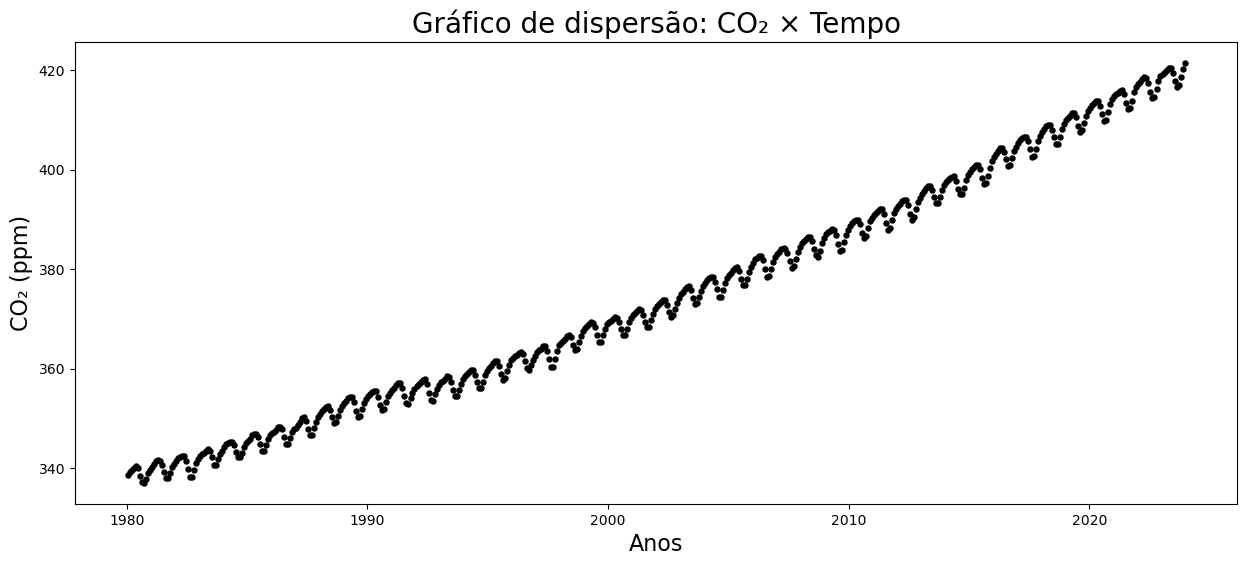

In [390]:
#definir variáveis x e y
y = np.array(df['Co2 ppm'])
x = np.array(df['decimal date'])
plotgrafico(funcao = False, titulo = "Gráfico de dispersão: CO\u2082 × Tempo", xlabel = "Anos", ylabel = "CO\u2082 (ppm)", fileN = "DispersaoCO2")

In [391]:
#teste da distribuição normal
sp.shapiro(y)

ShapiroResult(statistic=0.94922935962677, pvalue=1.7407256192036868e-12)

### Linear 1

In [392]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = x
y_ = y 
res = treinar_modelo(x_,y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.644e+04
Date:                Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:59:58   Log-Likelihood:                -1301.2
No. Observations:                 528   AIC:                             2606.
Df Residuals:                     526   BIC:                             2615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3357.2834     19.551   -171.718      0.0

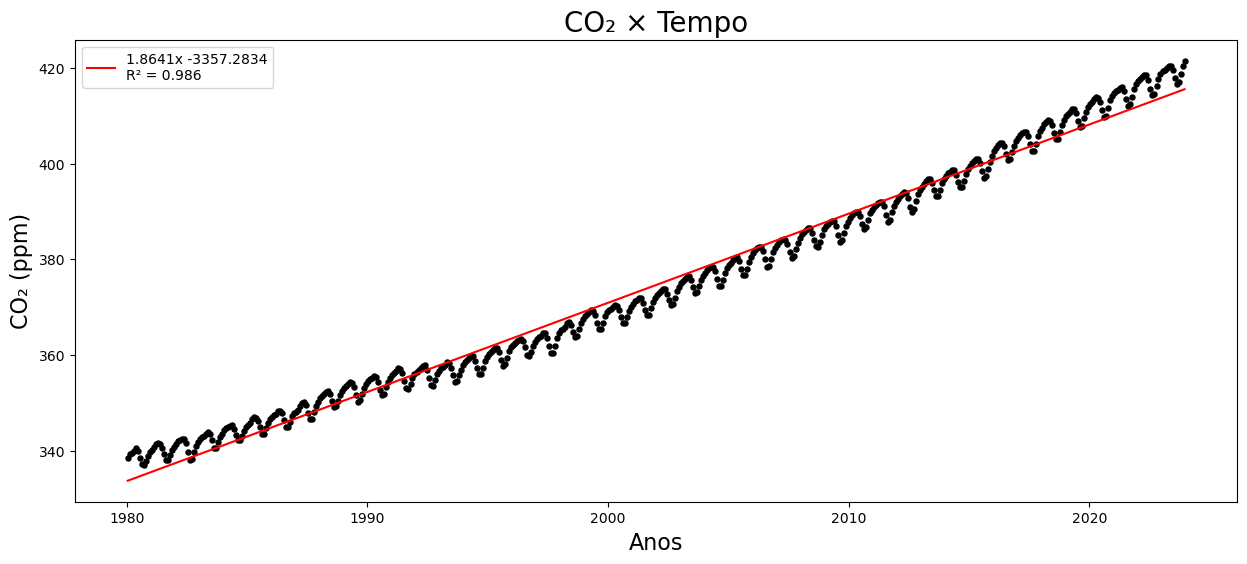

In [393]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}x {round(res.params[0],4)}\nR² = {round(res.rsquared, 3)}'
plotgrafico(titulo = "CO\u2082 × Tempo", xlabel = "Anos", ylabel = "CO\u2082 (ppm)", label = equacaolabel, linha = res.fittedvalues, fileN='P1-Linear1' )

In [394]:
res.pvalues

array([0., 0.])

In [395]:
res.f_pvalue

0.0

#### Comentários

### Logarítmico 1

In [396]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = np.log(x)
y_ = y
res = treinar_modelo(x_,y_)
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 3.505e+04
Date:                Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:59:58   Log-Likelihood:                -1311.3
No. Observations:                 528   AIC:                             2627.
Df Residuals:                     526   BIC:                             2635.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.799e+04    151.486   -184.744      0.0

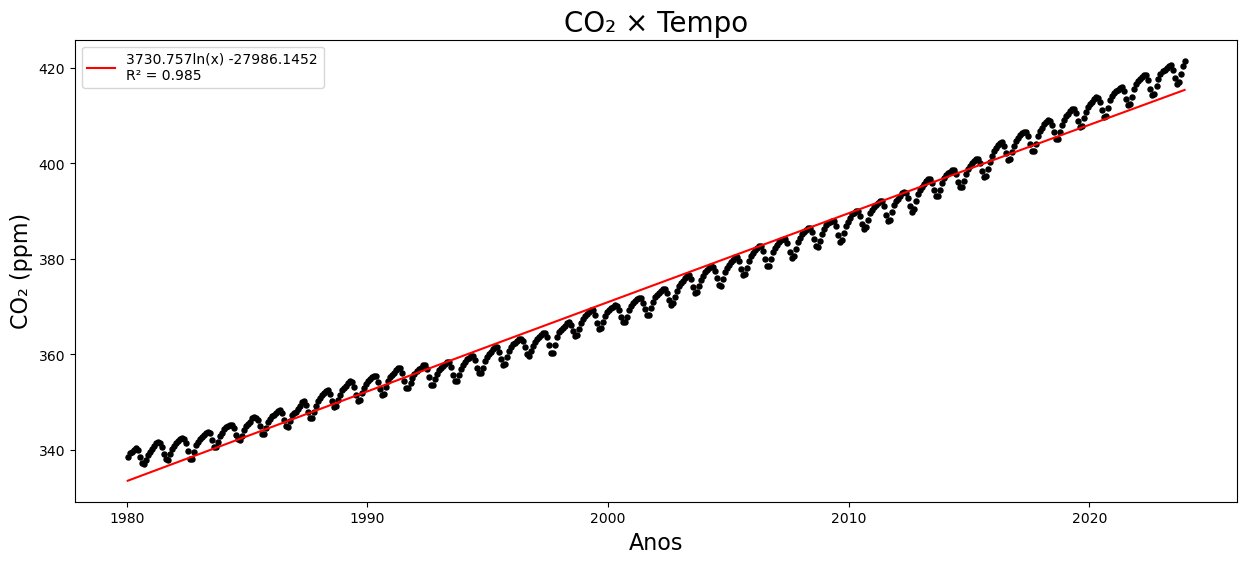

In [397]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}ln(x) {round(res.params[0],4)}\nR² = {round(res.rsquared, 3)}'
plotgrafico(titulo = "CO\u2082 × Tempo", xlabel = "Anos", ylabel = "CO\u2082 (ppm)", label = equacaolabel, linha = res.fittedvalues, fileN='P1-Log1' )

In [398]:
res.pvalues

array([0., 0.])

In [399]:
res.f_pvalue

0.0

#### Comentários

### Exponencial 1

In [400]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = x
y_ = np.log(y)
res = treinar_modelo(x_,y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 5.396e+04
Date:                Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:59:59   Log-Likelihood:                 1933.0
No. Observations:                 528   AIC:                            -3862.
Df Residuals:                     526   BIC:                            -3853.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0066      0.043    -93.722      0.0

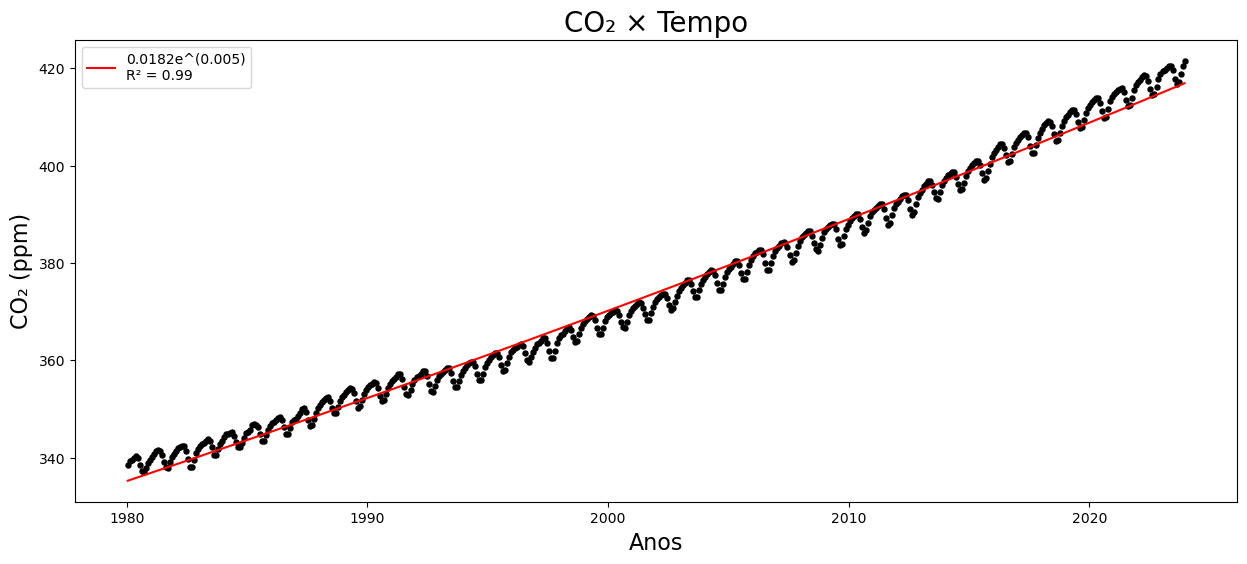

In [401]:
#Equação e Gráfico
equacaolabel = f'{round(np.exp(res.params[0]),4)}e^({round( res.params[1] ,4)})\nR² = {round(res.rsquared, 3)}'
funApro = np.exp(res.params[0]) * np.exp(res.params[1] * x)
plotgrafico(titulo = "CO\u2082 × Tempo", xlabel = "Anos", ylabel = "CO\u2082 (ppm)", label = equacaolabel,  linha = funApro, fileN='P1-Exponencial1' )

In [402]:
res.pvalues

array([0., 0.])

In [403]:
res.f_pvalue

0.0

#### Comentários

### Potencial 1

In [404]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = np.log(x)
y_ = np.log(y)
res = treinar_modelo(x_,y_)
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 5.180e+04
Date:                Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:59:59   Log-Likelihood:                 1922.3
No. Observations:                 528   AIC:                            -3841.
Df Residuals:                     526   BIC:                            -3832.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.5495      0.332   -209.732      0.0

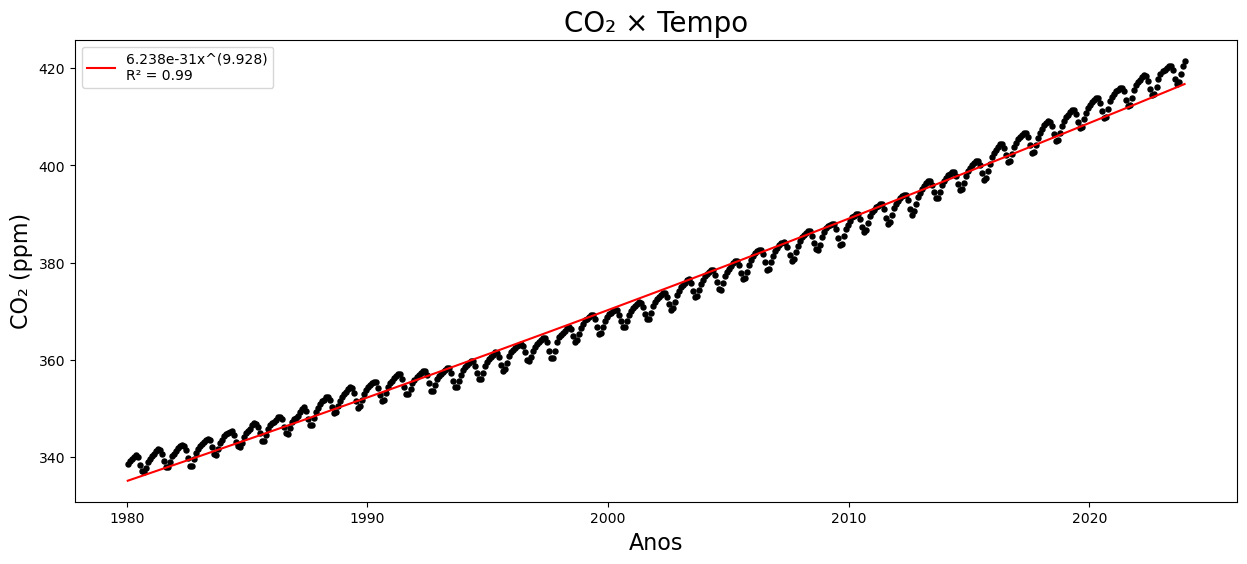

In [405]:
#Equação e Gráfico
equacaolabel = f'{np.exp(res.params[0]):.4g}x^({round(res.params[1],4):.4g})\nR² = {round(res.rsquared, 3)}'
funApro = np.exp(res.params[0]) * (x ** res.params[1])
plotgrafico(titulo = "CO\u2082 × Tempo", xlabel = "Anos", ylabel = "CO\u2082 (ppm)", label = equacaolabel,  linha = funApro, fileN='P1-Potencial' )

In [406]:
np.exp(res.params[0])

6.237903559843545e-31

In [407]:
res.pvalues

array([0., 0.])

In [408]:
res.f_pvalue

0.0

### Polinomial 1

#### Comentários

In [409]:
#Preparar model e treiná-lo, com teste t de student para significância
y_ = y
x_ = np.column_stack((x, x**2))
res = treinar_modelo(x_,y_)
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.428e+04
Date:                Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:00:00   Log-Likelihood:                -1015.0
No. Observations:                 528   AIC:                             2036.
Df Residuals:                     525   BIC:                             2049.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.092e+04   2005.379     30.379      0.0

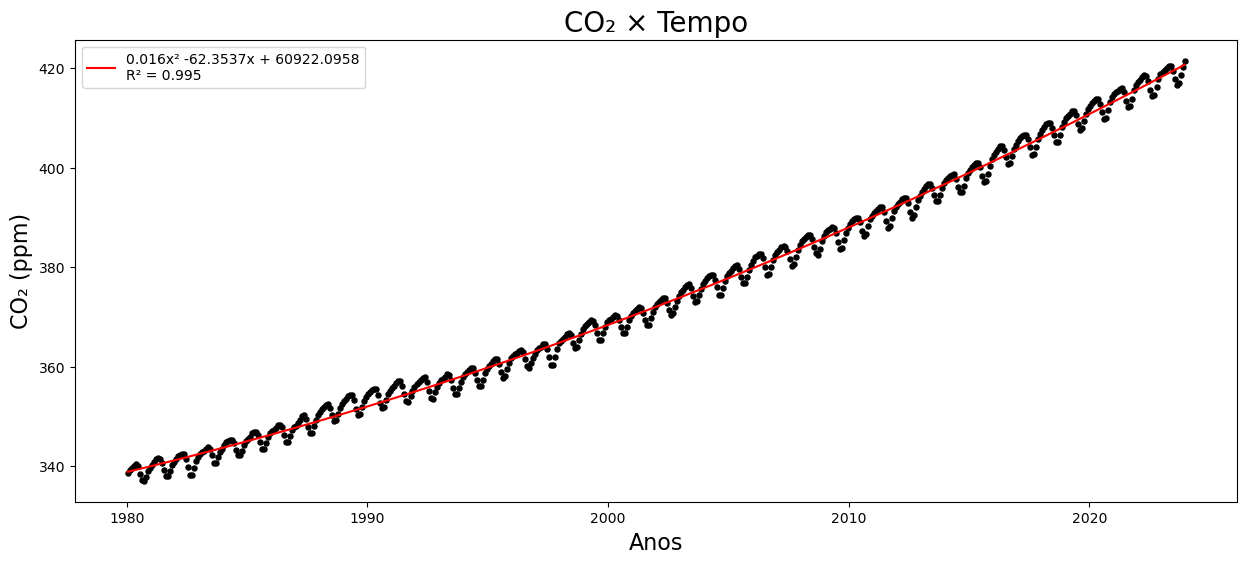

In [410]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[2],4)}x² {round(res.params[1],4)}x + {round(res.params[0],4)}\nR² = {round(res.rsquared, 3)}'
plotgrafico(titulo = "CO\u2082 × Tempo", xlabel = "Anos", ylabel = "CO\u2082 (ppm)", label = equacaolabel, linha = res.fittedvalues, fileN='P1-Polinomial' )

In [411]:
res.pvalues

array([9.69605412e-118, 2.72554257e-121, 1.07135782e-125])

In [412]:
res.f_pvalue

0.0

#### Comentários

## Anomalias de Temperatura x Tempo

Aqui serão realizados estudos de regressão linear simples e ajustes não lineares a partir de dados de uma série temporal de anomalias de temperatura em terra e oceanos, que calcula as anomalias com base nos anos anteriores.

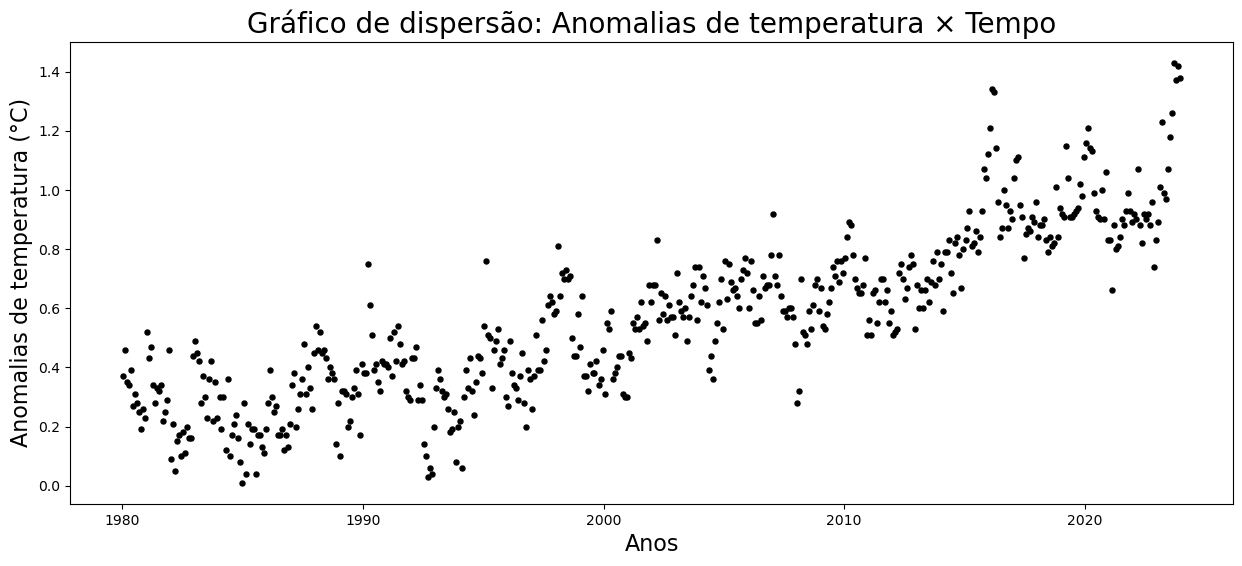

In [413]:

2#definir variáveis x e y
y = np.array(df['temperature anomalies'])
x = np.array(df['decimal date'])
plotgrafico(funcao = False, titulo = "Gráfico de dispersão: Anomalias de temperatura × Tempo", xlabel = "Anos", ylabel = "Anomalias de temperatura (°C)", fileN = "DispersaoTemp")

In [414]:
#teste da distribuição normal
sp.shapiro(y)

ShapiroResult(statistic=0.982763946056366, pvalue=6.6986208366870414e-06)

In [415]:
res.pvalues

array([9.69605412e-118, 2.72554257e-121, 1.07135782e-125])

### Linear 2

In [416]:
x_ = x
y_ = y
res = treinar_modelo(x_, y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     1570.
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          5.10e-160
Time:                        16:00:00   Log-Likelihood:                 292.79
No. Observations:                 528   AIC:                            -581.6
Df Residuals:                     526   BIC:                            -573.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.2769      0.955    -39.029      0.0

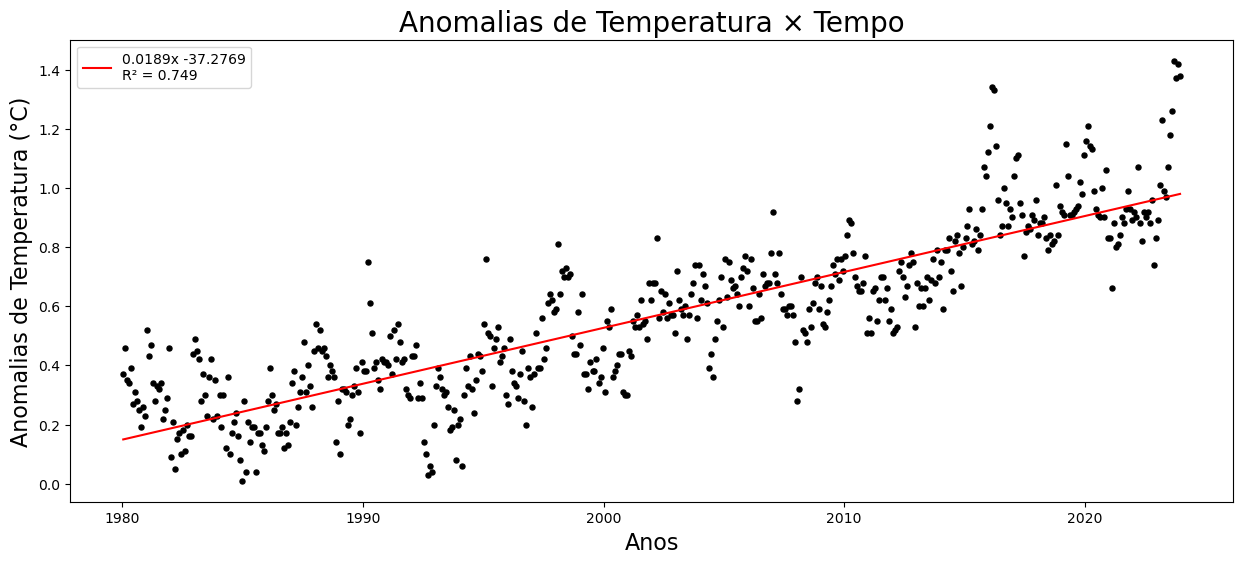

In [417]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}x {round(res.params[0],4)}\nR² = {round(res.rsquared, 3)}'
plotgrafico(titulo = "Anomalias de Temperatura × Tempo", xlabel = "Anos", ylabel = "Anomalias de Temperatura (°C)", label = equacaolabel, linha = res.fittedvalues, fileN='P2-Linear')

In [418]:
res.pvalues

array([1.88356053e-157, 5.09706583e-160])

In [419]:
res.f_pvalue

5.097065829252456e-160

#### Comentários

### Logarítmico 2

In [420]:
x_ = np.log(x)
y_ = y
res = treinar_modelo(x_, y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     1564.
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          1.10e-159
Time:                        16:00:01   Log-Likelihood:                 292.02
No. Observations:                 528   AIC:                            -580.0
Df Residuals:                     526   BIC:                            -571.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -286.9528      7.271    -39.466      0.0

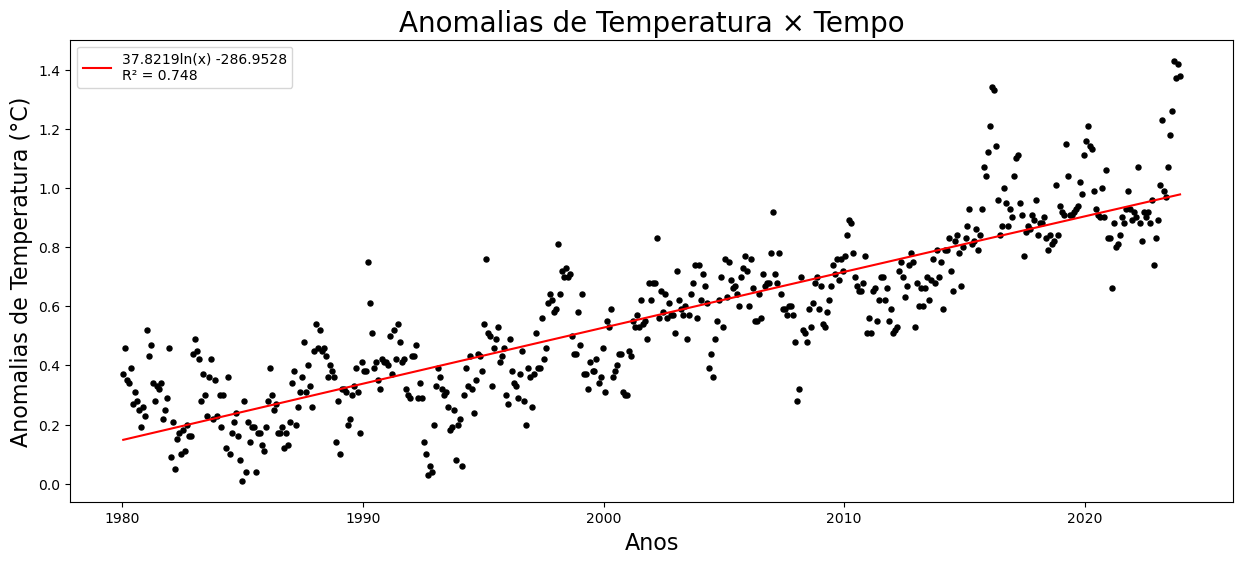

In [421]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}ln(x) {round(res.params[0],4)}\nR² = {round(res.rsquared, 3)}'
plotgrafico(titulo = "Anomalias de Temperatura × Tempo", xlabel = "Anos", ylabel = "Anomalias de Temperatura (°C)", label = equacaolabel, linha = res.fittedvalues, fileN='P2-Log') 

In [422]:
res.pvalues

array([2.38483016e-159, 1.09982504e-159])

In [423]:
res.f_pvalue

1.0998250442481086e-159

#### Comentários

### Exponencial 2

In [424]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = x
y_ = np.log(y)
res = treinar_modelo(x_,y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     787.3
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          1.38e-106
Time:                        16:00:01   Log-Likelihood:                -270.99
No. Observations:                 528   AIC:                             546.0
Df Residuals:                     526   BIC:                             554.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -78.6848      2.778    -28.321      0.0

In [425]:
np.exp(res.params[0])

6.724029611944079e-35

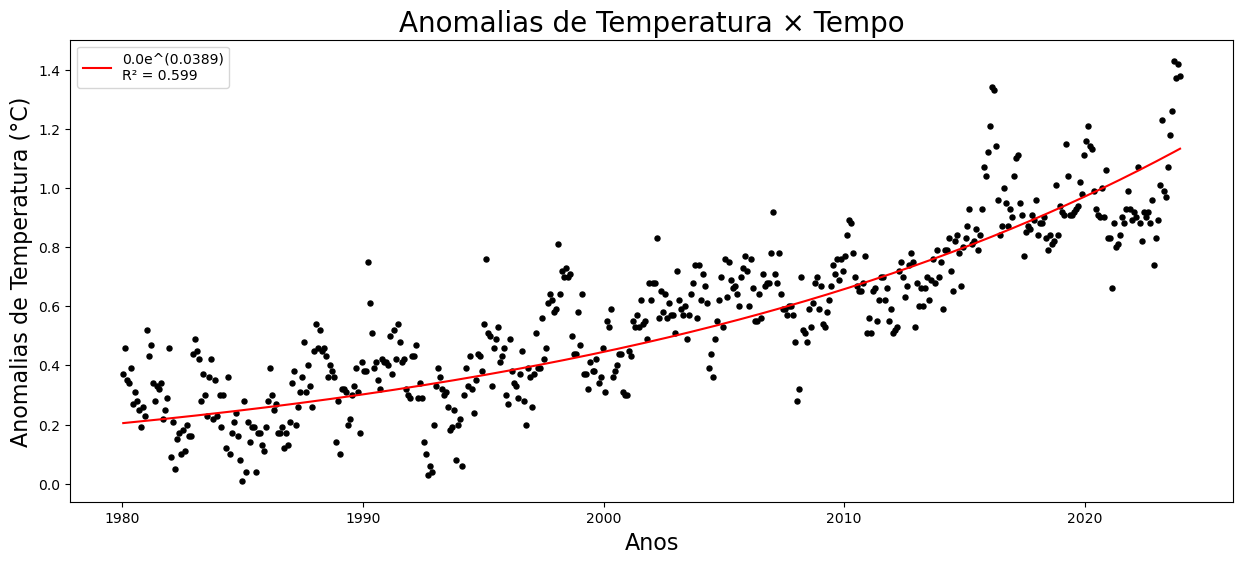

In [426]:
#Equação e Gráfico
equacaolabel = f'{round(np.exp(res.params[0]),4)}e^({round( res.params[1] ,4)})\nR² = {round(res.rsquared, 3)}'
funApro = np.exp(res.params[0]) * np.exp(res.params[1] * x)
plotgrafico(titulo = "Anomalias de Temperatura × Tempo", xlabel = "Anos", ylabel = "Anomalias de Temperatura (°C)", label = equacaolabel,  linha = funApro, fileN='P2-Exponencial')

In [427]:
res.pvalues

array([7.23553771e-108, 1.38158764e-106])

In [428]:
res.f_pvalue

1.3815876427938155e-106

#### Comentários

### Potencial 2

In [429]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = np.log(x)
y_ = np.log(y)
res = treinar_modelo(x_,y_)
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     787.6
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          1.30e-106
Time:                        16:00:01   Log-Likelihood:                -270.93
No. Observations:                 528   AIC:                             545.9
Df Residuals:                     526   BIC:                             554.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -593.3564     21.117    -28.099      0.0

In [430]:
np.exp(res.params[0])

2.0351841734758524e-258

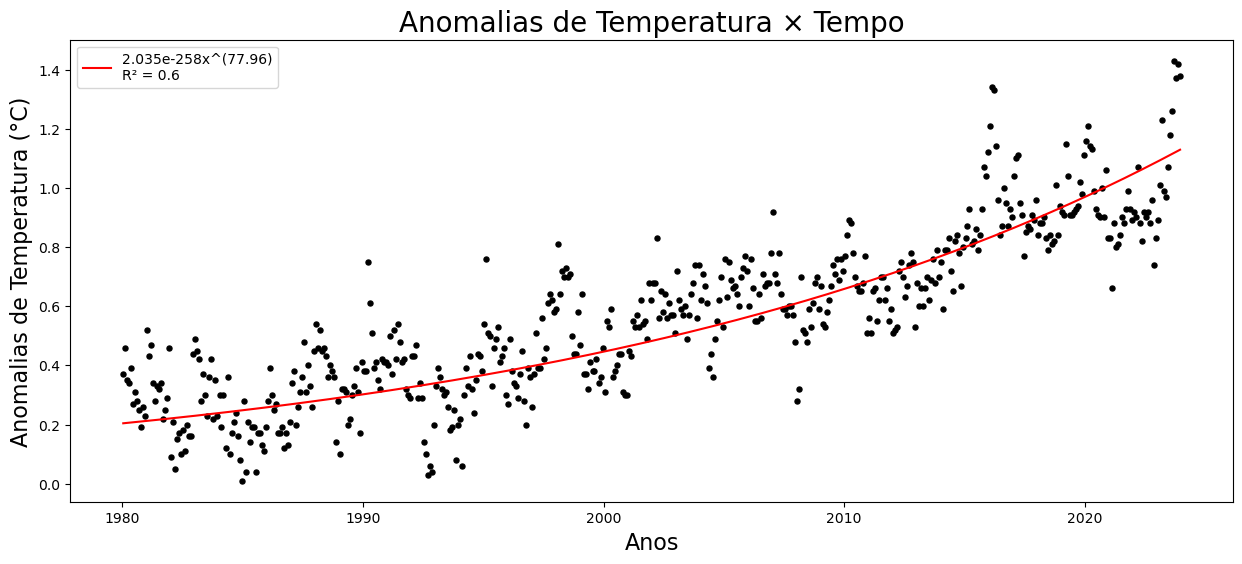

In [431]:
#Equação e Gráfico
equacaolabel = f'{np.exp(res.params[0]):.4g}x^({round(res.params[1],4):.4g})\nR² = {round(res.rsquared, 3)}'
funApro = np.exp(res.params[0]) * (x ** res.params[1])
plotgrafico(titulo = "Anomalias de Temperatura × Tempo", xlabel = "Anos", ylabel = "Anomalias de Temperatura (°C)", label = equacaolabel,  linha = funApro, fileN='P2-Potencial')

In [432]:
res.pvalues

array([8.83945297e-107, 1.30436561e-106])

In [433]:
res.f_pvalue

1.3043656077451531e-106

#### Comentários

### Polinomial 2

In [434]:
x_ = x
y_ = y

x_p = np.column_stack((x_, x_**2))


x_p = sm.add_constant(x_p)
model = sm.OLS(y_,x_p)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     883.8
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          8.93e-169
Time:                        16:00:02   Log-Likelihood:                 317.00
No. Observations:                 528   AIC:                            -628.0
Df Residuals:                     525   BIC:                            -615.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1105.2468    160.915      6.869      0.0

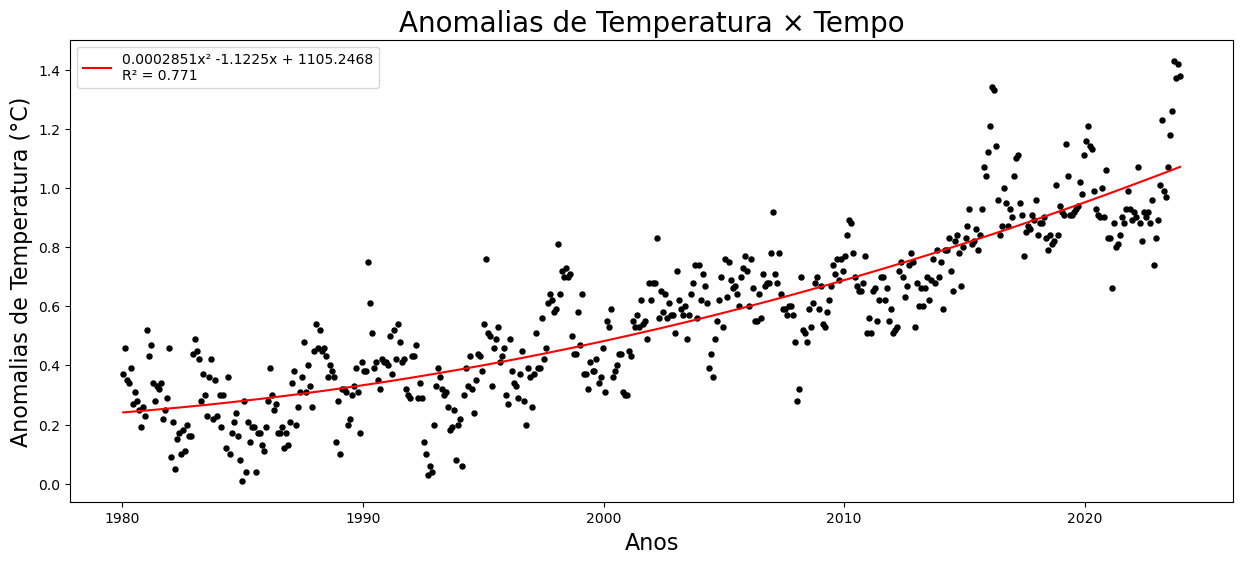

In [435]:
#Equação e Gráfico
equacaolabel = f'{res.params[2]:.4g}x² {round(res.params[1],4)}x + {round(res.params[0],4)}\nR² = {round(res.rsquared, 3)}'
plotgrafico(titulo = "Anomalias de Temperatura × Tempo", xlabel = "Anos", ylabel = "Anomalias de Temperatura (°C)", label = equacaolabel, linha = res.fittedvalues, fileN='P2-Polinomial' )

In [436]:
res.params[2]

0.0002850719941701309

In [437]:
res.pvalues

array([1.84094688e-11, 8.79279595e-12, 4.06584147e-12])

In [438]:
res.f_pvalue

8.928183950229295e-169

#### Comentários


## Anomalias de Temperatura x Co2

Aqui serão realizados estudos de regressão linear simples e ajustes não lineares a partir dos dados das anomalias de temperatura em terra e oceanos ao longo do tempo, mas em função das mudanças de concentração atmosférica do CO2 em partes por milhão ao longo do tempo

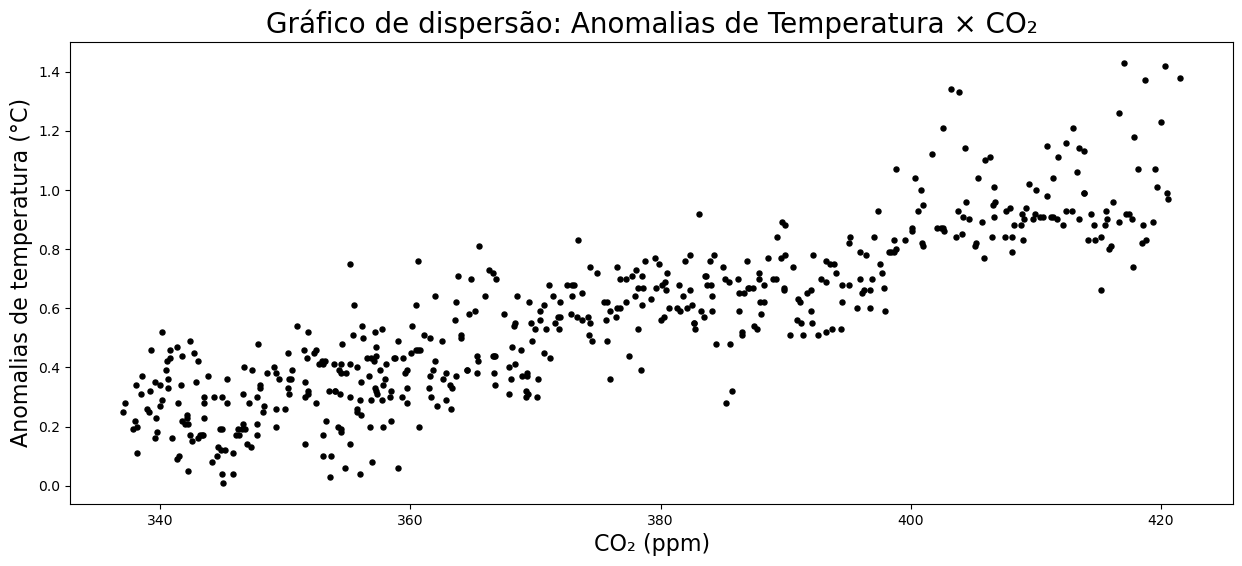

In [439]:
y = np.array(df['temperature anomalies'])
x = np.array(df['Co2 ppm'])
plotgrafico(funcao = False, titulo = "Gráfico de dispersão: Anomalias de Temperatura × CO\u2082", xlabel = "CO\u2082 (ppm)", ylabel = "Anomalias de temperatura (°C)", fileN = "DispersaoAmbos")

### Linear 3

In [440]:
x_ = x
y_ = y
res = treinar_modelo(x_, y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     1774.
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          1.25e-170
Time:                        16:00:03   Log-Likelihood:                 317.30
No. Observations:                 528   AIC:                            -630.6
Df Residuals:                     526   BIC:                            -622.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2626      0.091    -35.829      0.0

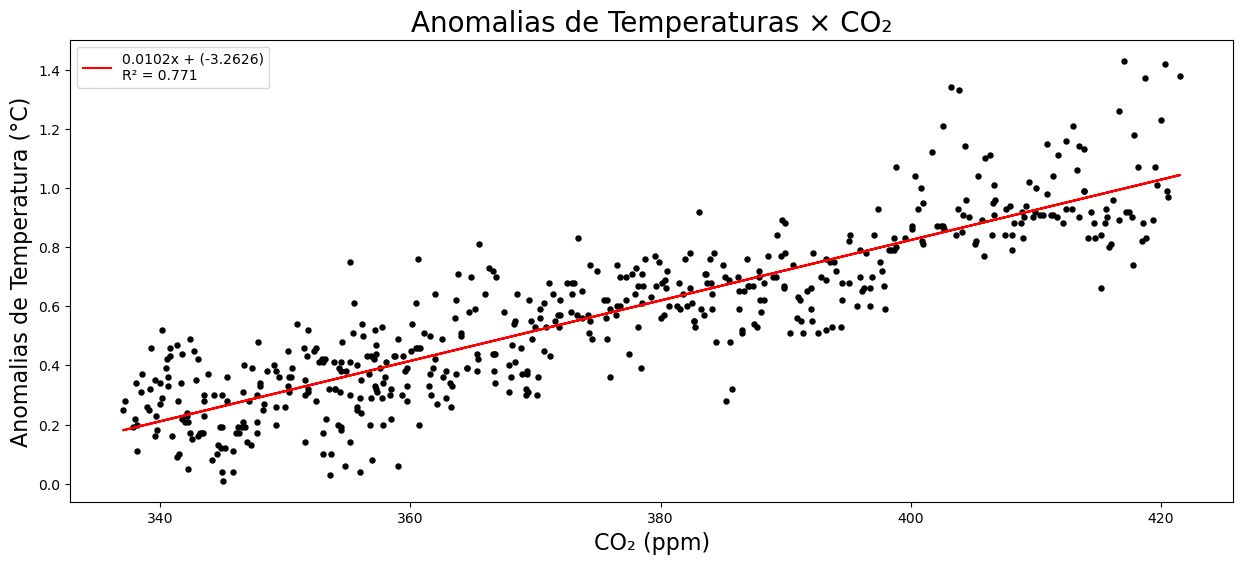

In [441]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}x + ({round(res.params[0],4)})\nR² = {round(res.rsquared, 3)}'
plotgrafico(titulo = "Anomalias de Temperaturas × CO\u2082", xlabel = "CO\u2082 (ppm)", ylabel = "Anomalias de Temperatura (°C)", label = equacaolabel, linha = res.fittedvalues, fileN='P3-Linear')

In [442]:
res.pvalues

array([3.02911461e-143, 1.25060921e-170])

In [443]:
res.f_pvalue

1.2506092088576149e-170

#### Comentários

### Logarítmico 3

In [444]:
x_ = np.log(x)
y_ = y
res = treinar_modelo(x_, y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     1742.
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          4.92e-169
Time:                        16:00:03   Log-Likelihood:                 313.61
No. Observations:                 528   AIC:                            -623.2
Df Residuals:                     526   BIC:                            -614.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.1836      0.545    -40.697      0.0

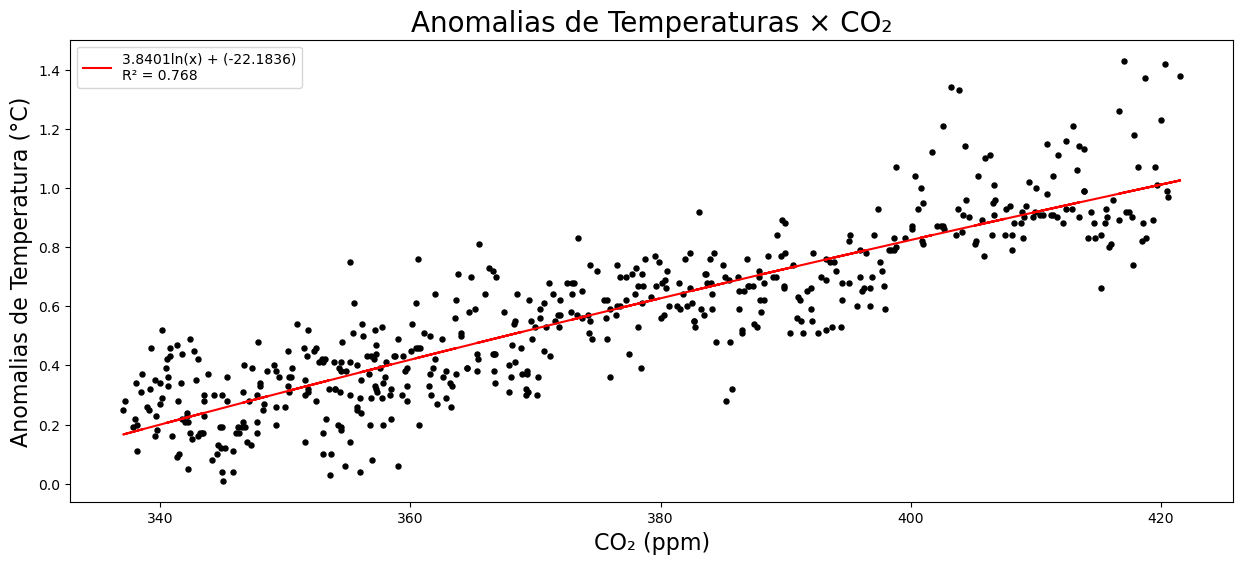

In [445]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}ln(x) + ({round(res.params[0],4)})\nR² = {round(res.rsquared, 3)}'
plotgrafico(titulo = "Anomalias de Temperaturas × CO\u2082", xlabel = "CO\u2082 (ppm)", ylabel = "Anomalias de Temperatura (°C)", label = equacaolabel, linha = res.fittedvalues, fileN='P3-Log')

In [446]:
res.pvalues

array([1.22668374e-164, 4.92308024e-169])

In [447]:
res.f_pvalue

4.923080241824273e-169

#### Comentários

### Exponencial 3

In [448]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = x
y_ = np.log(y)
res = treinar_modelo(x_,y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     776.7
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          1.16e-105
Time:                        16:00:03   Log-Likelihood:                -273.12
No. Observations:                 528   AIC:                             550.2
Df Residuals:                     526   BIC:                             558.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4790      0.279    -30.436      0.0

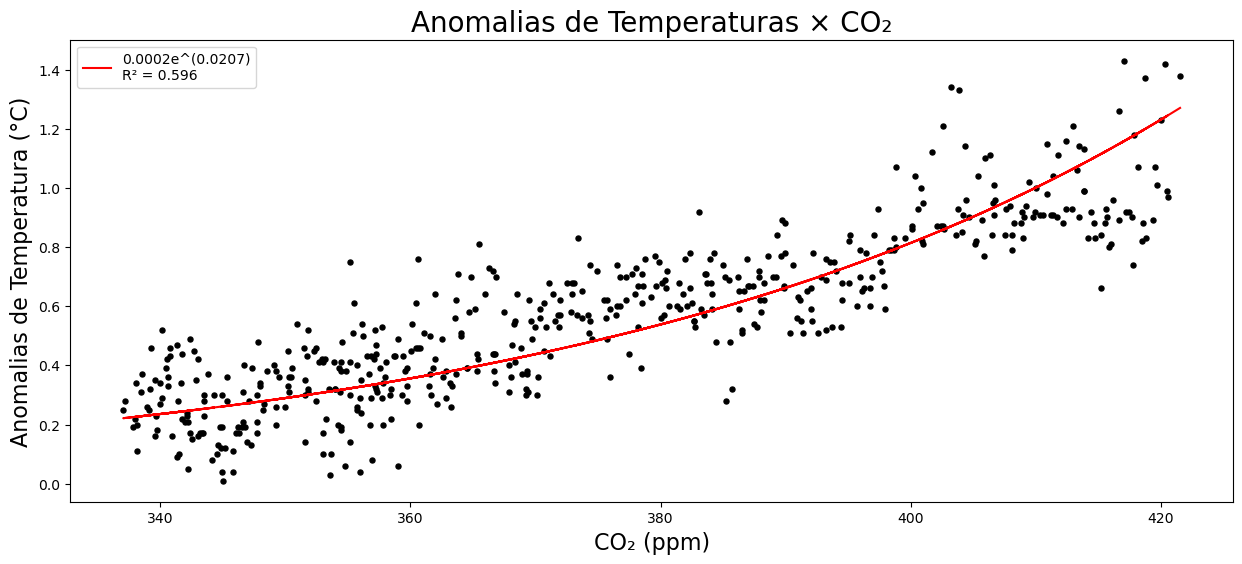

In [449]:
#Equação e Gráfico
equacaolabel = f'{round(np.exp(res.params[0]),4)}e^({round( res.params[1] ,4)})\nR² = {round(res.rsquared, 3)}'
funApro = np.exp(res.params[0]) * np.exp(res.params[1] * x)
plotgrafico(titulo = "Anomalias de Temperaturas × CO\u2082", xlabel = "CO\u2082 (ppm)", ylabel = "Anomalias de Temperatura (°C)", label = equacaolabel, linha = funApro, fileN='P3-Exponencial')

In [450]:
res.pvalues

array([4.30209825e-118, 1.16157356e-105])

In [451]:
res.f_pvalue

1.161573558944755e-105

#### Comentários

### Potencial 3

In [452]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = np.log(x)
y_ = np.log(y)
res = treinar_modelo(x_,y_)
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     792.1
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          5.27e-107
Time:                        16:00:04   Log-Likelihood:                -270.02
No. Observations:                 528   AIC:                             544.0
Df Residuals:                     526   BIC:                             552.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -47.0645      1.646    -28.587      0.0

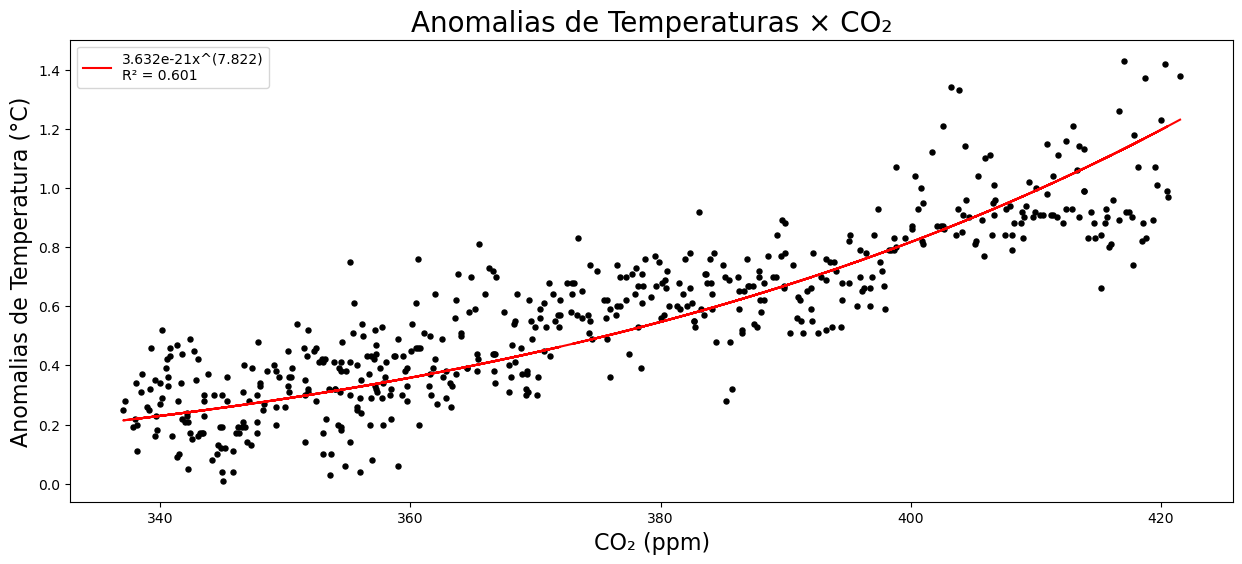

In [453]:
#Equação e Gráfico
equacaolabel = f'{np.exp(res.params[0]):.4g}x^({round(res.params[1],4):.4g})\nR² = {round(res.rsquared, 3)}'
funApro = np.exp(res.params[0]) * (x ** res.params[1])
plotgrafico(titulo = "Anomalias de Temperaturas × CO\u2082", xlabel = "CO\u2082 (ppm)", ylabel = "Anomalias de Temperatura (°C)", label = equacaolabel, linha = funApro, fileN='P3-Potencial')

In [454]:
np.exp(res.params[0])

3.6320014164363146e-21

In [455]:
res.pvalues

array([3.68331616e-109, 5.26977734e-107])

In [456]:
res.f_pvalue

5.269777341000459e-107

#### Comentários

### Polinomial 3

In [457]:
y_ = y
x_ = np.column_stack((x, x**2))
res = treinar_modelo(x_,y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     898.4
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          3.26e-170
Time:                        16:00:04   Log-Likelihood:                 320.33
No. Observations:                 528   AIC:                            -634.7
Df Residuals:                     525   BIC:                            -621.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6641      1.598      0.415      0.6

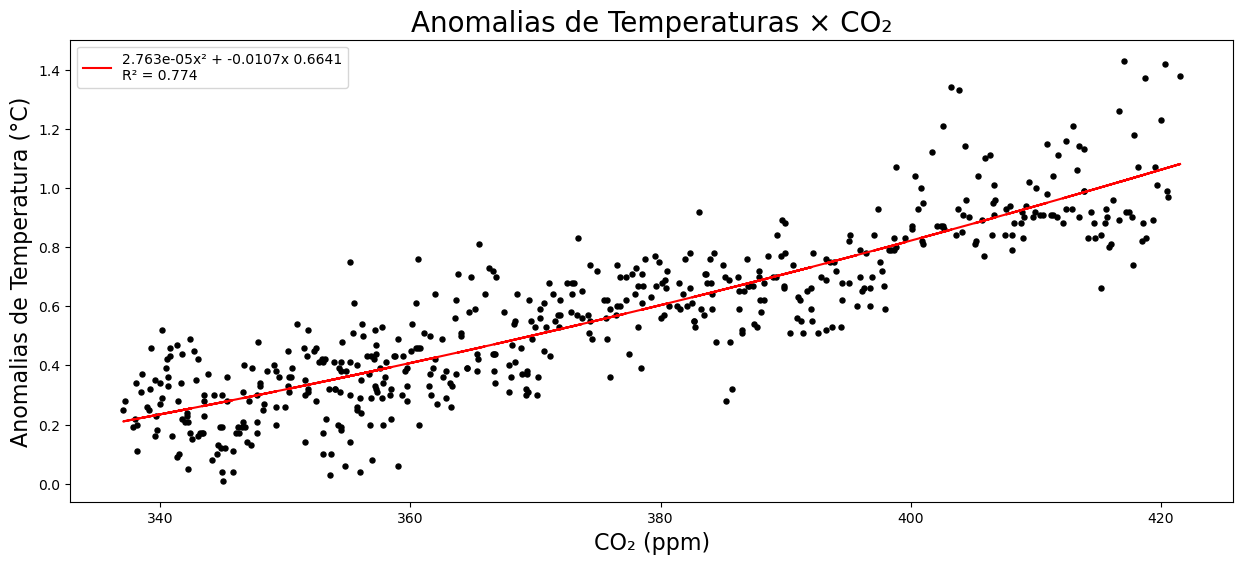

In [458]:
#Equação e Gráfico
equacaolabel = f'{res.params[2]:.4g}x² + {round(res.params[1],4)}x {round(res.params[0],4)}\nR² = {round(res.rsquared, 3)}'
plotgrafico(titulo = "Anomalias de Temperaturas × CO\u2082", xlabel = "CO\u2082 (ppm)", ylabel = "Anomalias de Temperatura (°C)", label = equacaolabel, linha = res.fittedvalues, fileN='P3-Polinomial')

In [459]:
res.pvalues

array([0.67797438, 0.20972124, 0.0141916 ])

In [460]:
res.f_pvalue

3.2574073981619992e-170

#### Comentários